# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [10]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [34]:
model = LinearRegression().fit(X_train, y_train)

print(f"Coefficient = {model.coef_}\n")
print(f"Intercept = {model.intercept_}")

Coefficient = [[-7.59539538e-02  3.72805048e-02  5.10651775e-02  2.35744290e+00
  -1.82261650e+01  4.10258245e+00 -9.10722503e-04 -1.36212013e+00
   2.60078244e-01 -1.15945115e-02 -9.74521994e-01  9.23519136e-03
  -5.14706117e-01]]

Intercept = [34.57460819]


In [35]:
y_pred = model.predict(X_train)

In [36]:
y_pred2 = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [37]:
from sklearn.metrics import r2_score

In [42]:
r2_tr = r2_score(y_pred, y_train)
print(f"R squared trained = {r2_tr}")

R squared trained = 0.6800741748957122


In [43]:
r2_tes = r2_score(y_pred2, y_test)
print(f"R squared tested = {r2_tes}")

R squared tested = 0.545143546118958


## 4. Calculate and print mean squared error for both the training and the testing set.

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
rmse_tr = mean_squared_error(y_pred, y_train)**0.5
print(f"Mean squared error trained = {rmse_tr}")

Mean squared error trained = 4.393772072018601


In [48]:
rmse_tes = mean_squared_error(y_pred2, y_test)**0.5
print(f"Mean squared error tested = {rmse_tes}")

Mean squared error tested = 5.722514730885622


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [49]:
from sklearn.metrics import mean_absolute_error

In [50]:
mae_tr = mean_absolute_error(y_pred, y_train)**0.5
print(f"Mean absolute error trained = {mae_tr}")

Mean absolute error trained = 1.7654682758720759


In [51]:
mae_tes = mean_absolute_error(y_pred2, y_test)**0.5
print(f"Mean absolute error trained = {mae_tes}")

Mean absolute error trained = 1.9334079490522538


## Classification Model Evaluation

In [53]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [55]:
from sklearn.linear_model import LogisticRegression

In [57]:
iris_model = LogisticRegression()
iris_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred_tr = iris_model.predict(X_train)

In [59]:
y_pred_tes = iris_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
acc_tr = accuracy_score(y_pred_tr, y_train)
print(f"Accuracy score trained = {acc_tr}")

Accuracy score trained = 0.975


In [62]:
acc_tes = accuracy_score(y_pred_tes, y_test)
print(f"Accuracy score tested = {acc_tes}")

Accuracy score tested = 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [64]:
from sklearn.metrics import balanced_accuracy_score

In [67]:
b_acc_tr = balanced_accuracy_score(y_pred_tr, y_train)
print(f"Balanced accuracy score trained = {b_acc_tr}")

Balanced accuracy score trained = 0.9755799755799757


In [68]:
b_acc_tes = balanced_accuracy_score(y_pred_tes, y_test)
print(f"Balanced accuracy score tested = {b_acc_tes}")

Balanced accuracy score tested = 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [69]:
from sklearn.metrics import precision_score

In [71]:
prec_tr = precision_score(y_pred_tr, y_train,average="weighted")
print(f"Precision score trained = {prec_tr}")

Precision score trained = 0.9752134146341463


In [72]:
prec_tes = precision_score(y_pred_tes, y_test,average="weighted")
print(f"Precision score tested = {prec_tes}")

Precision score tested = 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [73]:
from sklearn.metrics import recall_score

In [77]:
rec_tr = recall_score(y_pred_tr, y_train,average="weighted")
print(f"Recall score trained = {rec_tr}")

Recall score trained = 0.975


In [78]:
rec_tes = recall_score(y_pred_tes, y_test,average="weighted")
print(f"Recall score tested = {rec_tes}")

Recall score tested = 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [76]:
from sklearn.metrics import f1_score

In [79]:
f1_tr = f1_score(y_pred_tr, y_train,average="weighted")
print(f"F1 score trained = {f1_tr}")

F1 score trained = 0.9750076254384626


In [80]:
f1_tes = f1_score(y_pred_tes, y_test,average="weighted")
print(f"F1 score tested = {f1_tes}")

F1 score tested = 1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [81]:
from sklearn.metrics import confusion_matrix

In [86]:
conf = confusion_matrix(y_pred_tr, y_train)
conf_tr = pd.DataFrame(conf)
conf_tr

,0,1,2
0,39,0,0
1,0,38,1
2,0,2,40


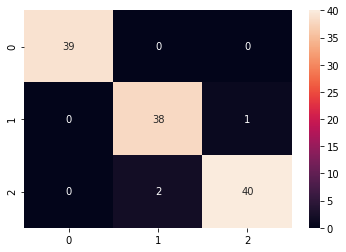

In [89]:
import seaborn as sns
sns.heatmap(conf_tr, annot=True);

In [87]:
conf2 = confusion_matrix(y_pred_tes, y_test)
conf_tes = pd.DataFrame(conf2)
conf_tes

,0,1,2
0,11,0,0
1,0,10,0
2,0,0,9


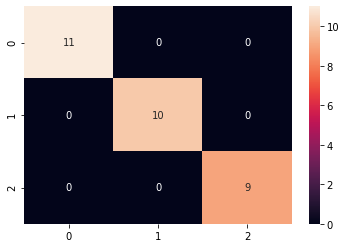

In [90]:
sns.heatmap(conf_tes, annot=True);

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

Let's try the **Linear Regression** on the *iris* dataset

In [91]:
iris_LR_model = LinearRegression().fit(X_train, y_train)

print(f"Coefficient = {iris_LR_model.coef_}\n")
print(f"Intercept = {iris_LR_model.intercept_}")

Coefficient = [[-0.12428052 -0.01503367  0.25503787  0.56002486]]

Intercept = [0.1359844]


- Predictions

In [93]:
y_pred_tr = iris_LR_model.predict(X_train)

In [94]:
y_pred_tes = iris_LR_model.predict(X_test)

- R2

In [99]:
r2_tr = r2_score(y_pred_tr, y_train)
print(f"R squared trained = {r2_tr}")

R squared trained = 0.9234675508721574


In [100]:
r2_tes = r2_score(y_pred_tes, y_test)
print(f"R squared tested = {r2_tes}")

R squared tested = 0.9253209255688921


- RMSE

In [101]:
rmse_tr = mean_squared_error(y_pred_tr, y_train)**0.5
print(f"Mean squared error trained = {rmse_tr}")

Mean squared error trained = 0.21765723952298346


In [102]:
rmse_tes = mean_squared_error(y_pred_tes, y_test)**0.5
print(f"Mean squared error tested = {rmse_tes}")

Mean squared error tested = 0.20813466191347355


- MAE

In [103]:
mae_tr = mean_absolute_error(y_pred_tr, y_train)**0.5
print(f"Mean absolute error trained = {mae_tr}")

Mean absolute error trained = 0.41034593506688244


In [104]:
mae_tes = mean_absolute_error(y_pred_tes, y_test)**0.5
print(f"Mean absolute error tested = {mae_tes}")

Mean absolute error tested = 0.39271575544668086
